In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
...,...,...,...
99984,99996,0,@Cupcake seems like a repeating problem hop...
99985,99997,1,@cupcake__ arrrr we both replied to each other...
99986,99998,0,@CuPcAkE_2120 ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ItemID         99989 non-null  int64 
 1   Sentiment      99989 non-null  int64 
 2   SentimentText  99989 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [5]:
df.describe()

,ItemID,Sentiment
count,99989.000000,99989.000000
mean,50005.110042,0.564632
std,28865.894393,0.495808
min,1.000000,0.000000
25%,25009.000000,0.000000
50%,50006.000000,1.000000
75%,75003.000000,1.000000
max,100000.000000,1.000000


In [6]:
df.isnull().sum() #check is there any null values

ItemID           0
Sentiment        0
SentimentText    0
dtype: int64

In [7]:
df.Sentiment.value_counts() #checking total count of postives(1) and negatives(0) label values

1    56457
0    43532
Name: Sentiment, dtype: int64

In [8]:
(df.Sentiment.value_counts()/len(df))*100 #checking percent of +ve and -ve labels

1    56.463211
0    43.536789
Name: Sentiment, dtype: float64

In [9]:
#to check the valence of a tweet in the data
from textblob import TextBlob
def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

df['sentiment'] = df['SentimentText'].apply(sentiment_calc)

In [10]:
df

,ItemID,Sentiment,SentimentText,sentiment
0,1,0,is so sad for my APL frie...,"(-0.5, 1.0)"
1,2,0,I missed the New Moon trail...,"(0.13636363636363635, 0.45454545454545453)"
2,3,1,omg its already 7:30 :O,"(0.05, 1.0)"
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,"(0.0, 0.0)"
4,5,0,i think mi bf is cheating on me!!! ...,"(0.0, 0.0)"
...,...,...,...,...
99984,99996,0,@Cupcake seems like a repeating problem hop...,"(0.5, 0.625)"
99985,99997,1,@cupcake__ arrrr we both replied to each other...,"(-0.041666666666666664, 0.3666666666666667)"
99986,99998,0,@CuPcAkE_2120 ya i thought so,"(0.0, 0.0)"
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...,"(0.43333333333333335, 0.5666666666666667)"


In [11]:
#in the column name "sentiment" the first value for tuple stands for polarity and the second one is subjectivity

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
vect = CountVectorizer(stop_words = 'english')
words = vect.fit_transform(df.SentimentText)
words_add = words.sum(axis=0)

frequency_of_words = [(word, words_add[0, i]) for word, i in vect.vocabulary_.items()]
frequency_of_words = sorted(frequency_of_words, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(frequency_of_words, columns=['words', 'frequency of words'])


<AxesSubplot:xlabel='words'>

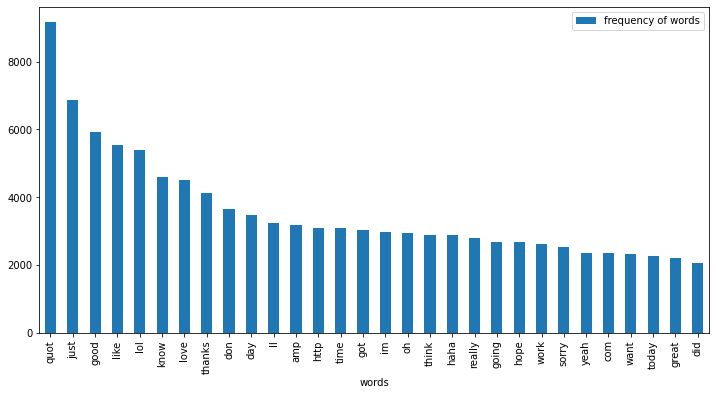

In [13]:
frequency.head(30).plot(x='words', y='frequency of words', kind='bar', figsize=(12, 6))

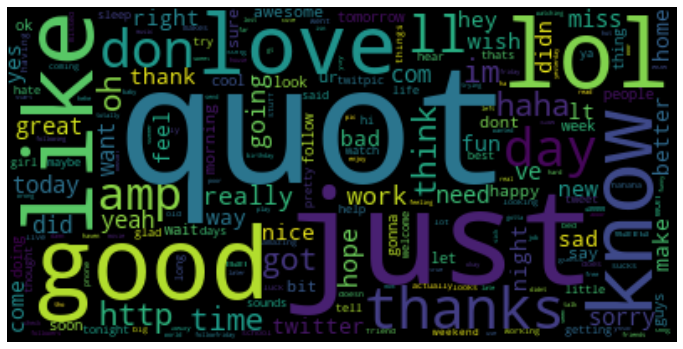

In [14]:
#now lets generate a word cloud
from wordcloud import WordCloud
wc = WordCloud().generate_from_frequencies(dict(frequency_of_words))

plt.figure(figsize=(12,7))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
#now lets preprocess the data
df['SentimentText'] = df['SentimentText'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [16]:
df.head()

,ItemID,Sentiment,SentimentText,sentiment
0,1,0,is so sad for my apl friend.............,"(-0.5, 1.0)"
1,2,0,i missed the new moon trailer...,"(0.13636363636363635, 0.45454545454545453)"
2,3,1,omg its already 7:30 :o,"(0.05, 1.0)"
3,4,0,.. omgaga. im sooo im gunna cry. i've been at ...,"(0.0, 0.0)"
4,5,0,i think mi bf is cheating on me!!! t_t,"(0.0, 0.0)"


In [18]:
df['SentimentText'] = df['SentimentText'].str.replace('[^\w\s]','')

In [19]:
df.head()

,ItemID,Sentiment,SentimentText,sentiment
0,1,0,is so sad for my apl friend,"(-0.5, 1.0)"
1,2,0,i missed the new moon trailer,"(0.13636363636363635, 0.45454545454545453)"
2,3,1,omg its already 730 o,"(0.05, 1.0)"
3,4,0,omgaga im sooo im gunna cry ive been at this ...,"(0.0, 0.0)"
4,5,0,i think mi bf is cheating on me t_t,"(0.0, 0.0)"


In [20]:
df['n_words'] = df['SentimentText'].apply(len)

In [22]:
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

def process_tweet(SentimentText):
    SentimentText =  " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",SentimentText.lower()).split())
    SentimentText = nltk.word_tokenize(SentimentText)
    stemmer = PorterStemmer()
    stem = [stemmer.stem(word) for word in SentimentText]
    words = [word for word in stem if word not in stopwords.words('english')]
    SentimentText = " ".join(words)
    
    return SentimentText

df["SentimentText"] = df["SentimentText"].apply(process_tweet)
df.head()

,ItemID,Sentiment,SentimentText,sentiment,n_words
0,1,0,sad apl friend,"(-0.5, 1.0)",27
1,2,0,miss new moon trailer,"(0.13636363636363635, 0.45454545454545453)",29
2,3,1,omg alreadi 730,"(0.05, 1.0)",21
3,4,0,omgaga im sooo im gunna cri ive thi dentist si...,"(0.0, 0.0)",109
4,5,0,think mi bf cheat,"(0.0, 0.0)",35


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
vectorizer = TfidfVectorizer(use_idf=True)
x = vectorizer.fit_transform(df["SentimentText"])

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,df["Sentiment"],test_size = 0.2,random_state = 42)

In [27]:
x_train.shape

(79991, 105018)

In [28]:
x_test.shape

(19998, 105018)

In [30]:
y_train.shape

(79991,)

In [31]:
y_test.shape

(19998,)

In [32]:
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
clf_a = LogisticRegression()
clf_a.fit(x_train,y_train)

/home/admin2/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
df_score = pd.DataFrame(index=None, columns=['model','recall_score','precision_score','f1_score','accuracy-score'])

pred = clf_a.predict(x_test)
score1 = recall_score(y_test,pred)
score2 = precision_score(y_test,pred)
score3 = f1_score(y_test,pred)
acc = accuracy_score(y_test,pred)

df_score = df_score.append(pd.Series({
                "model" : clf_a.__class__.__name__,
                "recall_score" : score1,
                "precision_score" : score2,
                "f1_score" : score3,
                "accuracy-score" : acc}),ignore_index = True)

In [41]:
df_score # for Logistic Regression

,model,recall_score,precision_score,f1_score,accuracy-score
0,LogisticRegression,0.844772,0.754666,0.797181,0.758226


In [42]:
from sklearn.tree import DecisionTreeClassifier
clf_c = DecisionTreeClassifier()
clf_c.fit(x_train,y_train)
pred = clf_c.predict(x_test)

In [43]:
score1 = recall_score(y_test,pred)
score2 = precision_score(y_test,pred)
score3 = f1_score(y_test,pred)
acuracy_score = accuracy_score(y_test,pred)
  
df_score = df_score.append(pd.Series({
                "model" : clf_c.__class__.__name__,
                "recall_score" : score1,
                "precision_score" : score2,
                "f1_score" : score3,
                "accuracy-score" : acuracy_score}),ignore_index = True)


In [44]:
df_score

,model,recall_score,precision_score,f1_score,accuracy-score
0,LogisticRegression,0.844772,0.754666,0.797181,0.758226
1,DecisionTreeClassifier,0.708837,0.718094,0.713436,0.679718


In [ ]:
2+2